<a href="https://colab.research.google.com/github/Minalraj123/ANN-Car-Sales-price-prediction/blob/main/Car_Purchasing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#Reading Dataset
data = pd.read_csv("/content/car_purchasing.csv",encoding='ISO-8859-1') #Reading a File

In [132]:
#returns the first n rows for the object based on position
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [92]:
#printing information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [93]:
data.keys()

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [94]:
# Check if columns exist before dropping
columns_to_drop = ['customer name', 'customer e-mail', 'country']

# Ensure all columns exist in the DataFrame before trying to drop
columns_in_data = data.columns
columns_not_found = [col for col in columns_to_drop if col not in columns_in_data]

if columns_not_found:
    print(f"These columns are not in the data: {', '.join(columns_not_found)}")
else:
    data = data.drop(columns_to_drop, axis=1)
    print(data.head())


   gender        age  annual Salary  credit card debt    net worth  \
0       0  41.851720    62812.09301      11609.380910  238961.2505   
1       0  40.870623    66646.89292       9572.957136  530973.9078   
2       1  43.152897    53798.55112      11160.355060  638467.1773   
3       1  58.271369    79370.03798      14426.164850  548599.0524   
4       1  57.313749    59729.15130       5358.712177  560304.0671   

   car purchase amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248  


In [136]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [96]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               500 non-null    int64  
 1   age                  500 non-null    float64
 2   annual Salary        500 non-null    float64
 3   credit card debt     500 non-null    float64
 4   net worth            500 non-null    float64
 5   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [97]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [98]:
x=data.iloc[:,0:4]
x

,gender,age,annual Salary,credit card debt
0,0,41.851720,62812.09301,11609.380910
1,0,40.870623,66646.89292,9572.957136
2,1,43.152897,53798.55112,11160.355060
3,1,58.271369,79370.03798,14426.164850
4,1,57.313749,59729.15130,5358.712177
...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524
496,1,37.642000,56039.49793,12301.456790
497,1,53.943497,68888.77805,10611.606860
498,1,59.160509,49811.99062,14013.034510


In [137]:
y=data.iloc[:,5]
y

,annual Salary
0,62812.09301
1,66646.89292
2,53798.55112
3,79370.03798
4,59729.15130
...,...
495,71942.40291
496,56039.49793
497,68888.77805
498,49811.99062


In [143]:
from sklearn.preprocessing import StandardScaler

In [138]:
sc=StandardScaler()
x=sc.fit_transform(x)
y=sc.fit_transform(y.values.reshape(-1, 1))


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=52)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 4)
(100, 4)
(400, 1)
(100, 1)


In [104]:
x_train

array([[-1.01207287,  1.22294436, -1.93631754,  0.39724875],
       [ 0.98807114,  0.46291564, -0.58449584, -0.04089711],
       [-1.01207287, -0.54824449,  0.70424295,  0.69342804],
       ...,
       [-1.01207287,  0.28288485,  0.52834487, -0.04035059],
       [-1.01207287, -1.80758521,  0.27247846,  0.5138656 ],
       [-1.01207287,  0.6346207 , -2.3925124 , -1.23121273]])

In [105]:
x_train

array([[-1.01207287,  1.22294436, -1.93631754,  0.39724875],
       [ 0.98807114,  0.46291564, -0.58449584, -0.04089711],
       [-1.01207287, -0.54824449,  0.70424295,  0.69342804],
       ...,
       [-1.01207287,  0.28288485,  0.52834487, -0.04035059],
       [-1.01207287, -1.80758521,  0.27247846,  0.5138656 ],
       [-1.01207287,  0.6346207 , -2.3925124 , -1.23121273]])

In [106]:
x_train.shape

(400, 4)

In [107]:
x_test

array([[-1.01207287e+00, -7.30174022e-01,  6.77807482e-01,
        -1.40756033e+00],
       [ 9.88071144e-01,  2.16595618e-01, -8.20501490e-01,
        -5.80627396e-01],
       [ 9.88071144e-01, -1.07888661e+00, -5.20690560e-01,
         7.72818668e-01],
       [-1.01207287e+00,  4.03971991e-01,  1.30932768e+00,
        -7.70431905e-01],
       [-1.01207287e+00,  1.17786796e+00, -6.31742584e-02,
         1.33756956e+00],
       [ 9.88071144e-01, -8.21133861e-01,  4.82858936e-01,
        -7.80445552e-01],
       [-1.01207287e+00,  1.94519288e-01,  2.10227417e+00,
         1.30877500e-02],
       [ 9.88071144e-01,  1.26795152e-02,  1.73614282e+00,
        -5.97410768e-01],
       [-1.01207287e+00,  3.82393427e-01,  4.70643549e-01,
         3.75594969e-01],
       [ 9.88071144e-01,  1.64678799e-01, -4.07057657e-01,
         1.62980177e-01],
       [ 9.88071144e-01, -5.19331517e-01, -7.44100581e-01,
        -4.89010215e-01],
       [ 9.88071144e-01, -8.02400619e-01,  9.26747707e-02,
      

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [109]:
import tensorflow as tf
yep=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.2,verbose=0,baseline=None,restore_best_weights=True,
                                             start_from_epoch=0,patience=2)

In [110]:
model=Sequential()

In [111]:
model.add(Dense(units=10,activation='relu'))

In [112]:
model.add(Dense(units=10,activation='relu'))
#model.add(Dropout(0.2))     #deactive the 2 neuron (to decrese overfitting)

In [113]:
model.add(Dense(1,activation='linear'))

In [114]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [115]:
model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mean_absolute_error'])

In [116]:
ANN=model.fit(x_train, y_train,validation_split=0.2,batch_size=50,epochs=70)

Epoch 1/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.7114 - mean_absolute_error: 1.0482 - val_loss: 0.7750 - val_mean_absolute_error: 0.6797
Epoch 2/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7155 - mean_absolute_error: 0.6656 - val_loss: 0.5229 - val_mean_absolute_error: 0.5779
Epoch 3/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4580 - mean_absolute_error: 0.5258 - val_loss: 0.3535 - val_mean_absolute_error: 0.4810
Epoch 4/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2931 - mean_absolute_error: 0.4287 - val_loss: 0.3059 - val_mean_absolute_error: 0.4539
Epoch 5/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2332 - mean_absolute_error: 0.3796 - val_loss: 0.3094 - val_mean_absolute_error: 0.4601
Epoch 6/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2178 - mean_absolute_error: 0.3751 - val_loss: 0.3147 - val_mean_absolute_error: 0.4710
Epoch 7/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1967 - mean_absolute_error: 0.3479 - val_loss: 0.2922 - val_

In [117]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

In [118]:
ANN.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

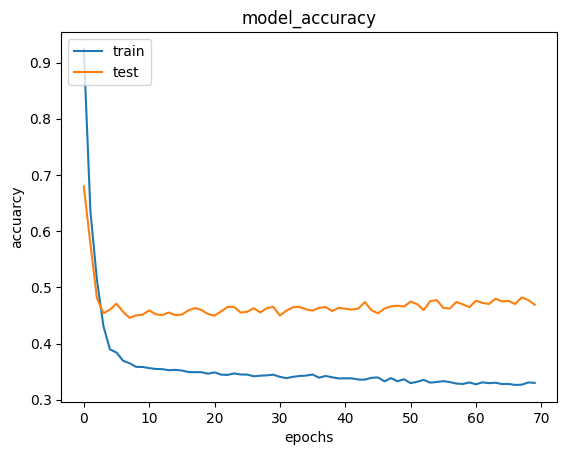

In [119]:
plt.plot(ANN.history['mean_absolute_error'])
plt.plot(ANN.history['val_mean_absolute_error'])
plt.title('model_accuracy')
plt.ylabel('accuarcy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

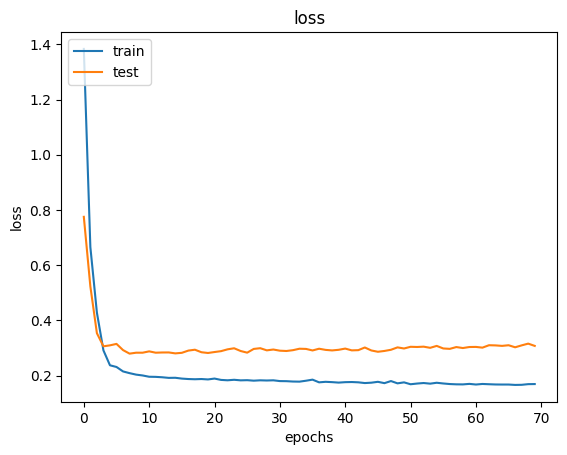

In [120]:
plt.plot(ANN.history['loss'])
plt.plot(ANN.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

In [121]:
y_pred=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [122]:
y_pred

array([[ 0.11812118],
       [-0.3237019 ],
       [-0.9601593 ],
       [ 1.1353953 ],
       [ 0.8179624 ],
       [-0.40729627],
       [ 1.2641301 ],
       [ 1.0407948 ],
       [ 0.58790815],
       [-0.34757075],
       [-0.9062767 ],
       [-0.55861694],
       [-0.06472938],
       [ 0.46538922],
       [ 0.47353283],
       [ 0.3423337 ],
       [-1.141576  ],
       [ 0.0313077 ],
       [ 0.44512704],
       [ 1.0287801 ],
       [ 1.2829816 ],
       [ 0.06560698],
       [-0.3137679 ],
       [ 0.20518932],
       [-0.5501619 ],
       [ 0.9143071 ],
       [-0.10355631],
       [ 0.3450768 ],
       [ 0.11018178],
       [ 0.44129995],
       [ 2.0917048 ],
       [-0.38594794],
       [ 0.00789154],
       [ 0.9729842 ],
       [ 0.1984061 ],
       [ 0.59146154],
       [-0.12019234],
       [-0.6448947 ],
       [-0.25771633],
       [ 0.12268543],
       [ 0.40037918],
       [ 0.3313507 ],
       [ 0.1960139 ],
       [-0.23132673],
       [ 0.41923293],
       [-0

In [123]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [124]:
score*100


67.44181800596711